# This notebook is part of Section 5.4

## Import the libraries

In [3]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,mean_squared_error
from math import sqrt
from sklearn import tree

## Fix the Path

In [4]:
os.chdir("D:")
os.getcwd()

'D:\\'

## Import the dataset

In [5]:
credit=pd.read_csv('credit.csv',sep=',')

## Split the dataset

In [6]:
X=credit[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt']]
Y=credit['default']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=43)

## Convert Categorical Variables

In [8]:
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)

## Create a Random Forest Classifier

In [9]:
rf = RandomForestClassifier(n_estimators=500,max_depth=4,random_state=42,n_jobs=-1)

## Train the model

In [11]:
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

## Test the model

In [14]:
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)
print(accuracy_score(Y_train,y_pred_train))
print(accuracy_score(Y_test,y_pred_test))

0.8571428571428571
0.7714285714285715


## Feature Importnace

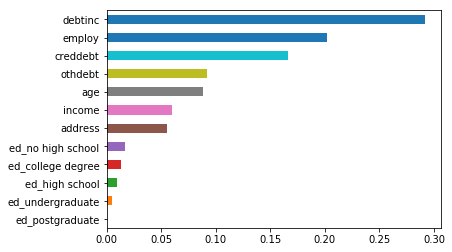

In [19]:
importances_rf = pd.Series(rf.feature_importances_,
index = X_train.columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh')
plt.show()

# Random Forest Regressor

## Import the dataset

In [20]:
cars_df=pd.read_excel('cars.xls')

## Split the dataset

In [23]:
y=cars_df.MPG
X=cars_df[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Year', 'Origin']]
X=pd.get_dummies(X,drop_first=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## Train the model

In [29]:
rf = RandomForestRegressor(n_estimators=100,max_depth=4,random_state=42,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

## Test the model

In [30]:
y_pred=rf.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

2.7928446988819404


## Feature Importance

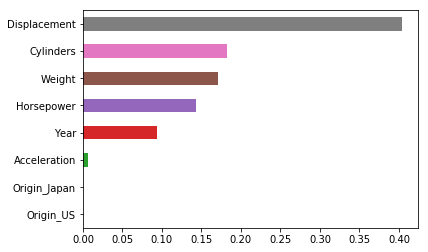

In [27]:
importances_rf = pd.Series(rf.feature_importances_,
index = X_train.columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh')
plt.show()